Load the data from "beauty.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('beauty.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'beauty.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


(1260, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB
None
wage        0
exper       0
union       0
goodhlth    0
black       0
female      0
married     0
service     0
educ        0
looks       0
dtype: int64
wage        0.0
exper       0.0
union       0.0
goodhlth    0.0
black       0.0
female      0.0
married     0.0
service     0.0
educ        0.0
looks       0.0
dtype: float64
              wage        exper        un

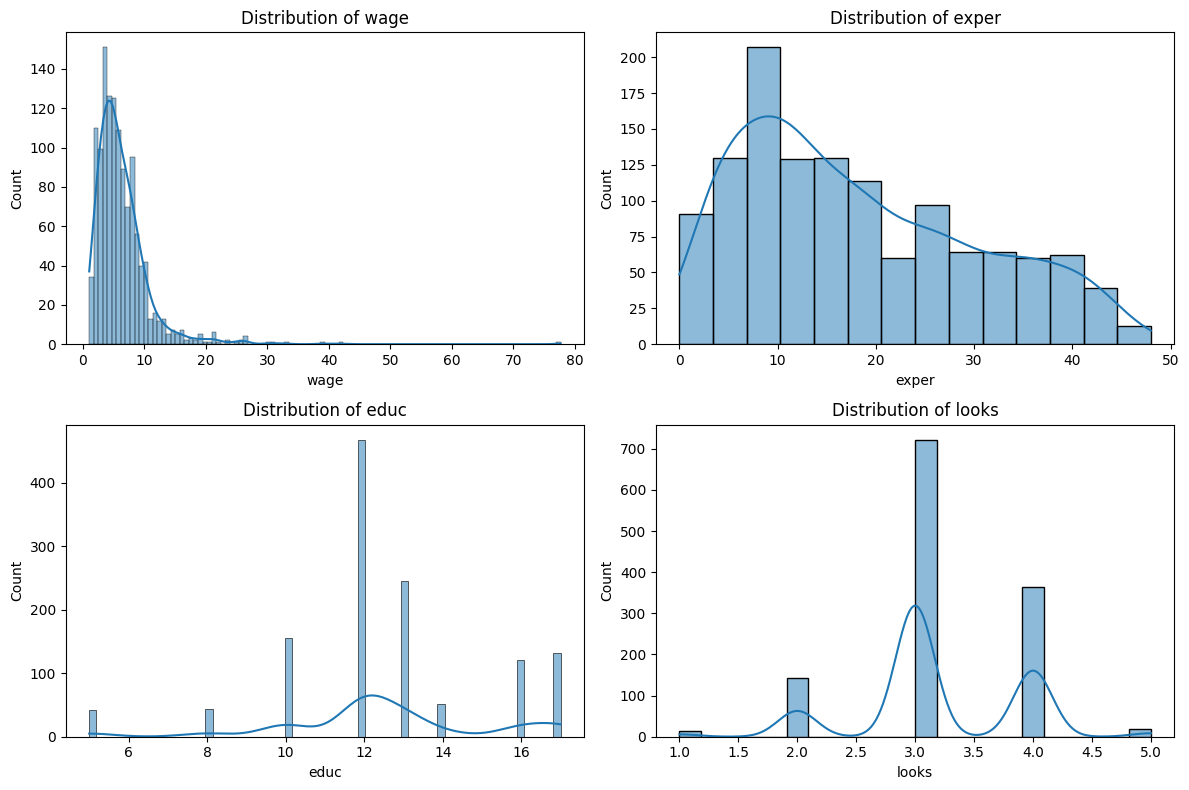

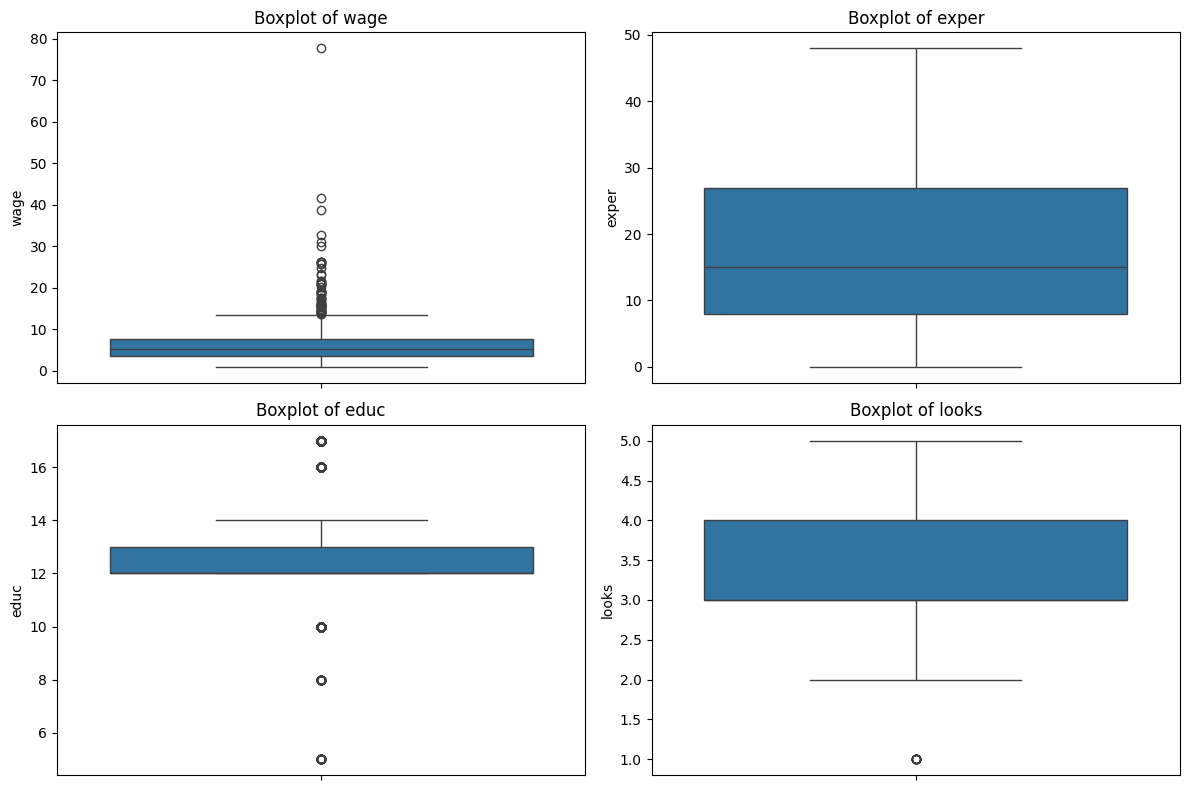

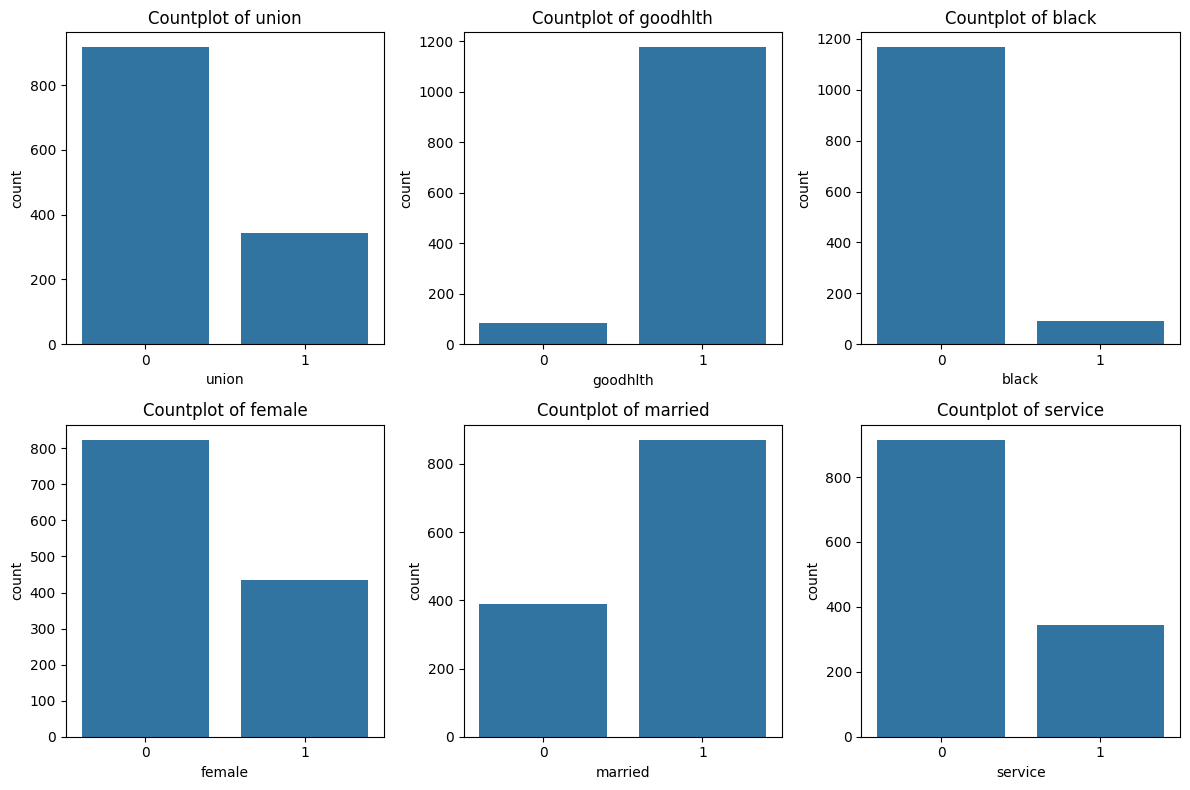

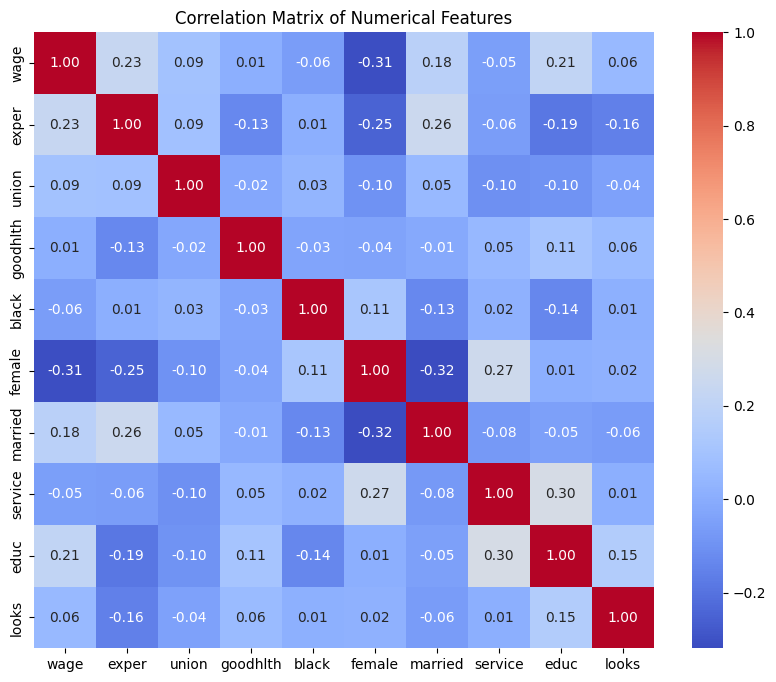

In [ ]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Summary statistics
print(df.describe())

# Visualizations for numerical features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(['wage', 'exper', 'educ', 'looks']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(['wage', 'exper', 'educ', 'looks']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Visualizations for categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['union', 'goodhlth', 'black', 'female', 'married', 'service']):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

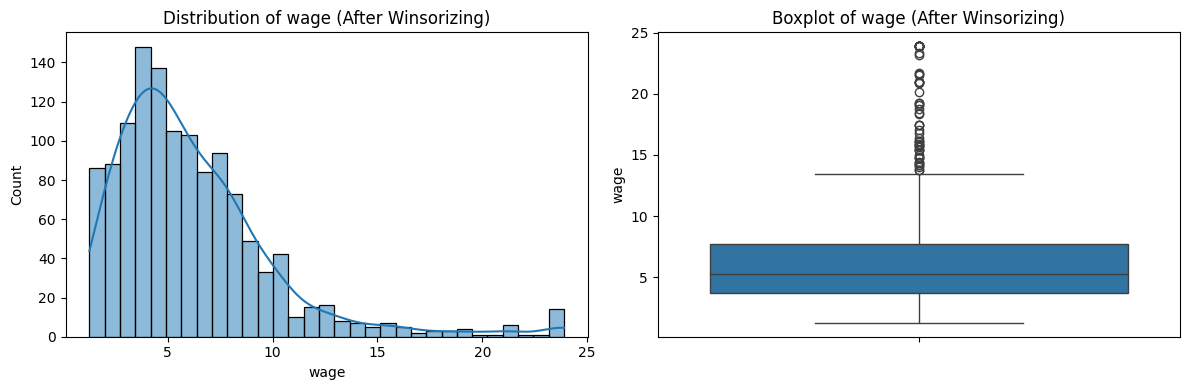

count    1260.000000
mean        6.210504
std         3.923907
min         1.270000
25%         3.707500
50%         5.300000
75%         7.695000
max        23.898100
Name: wage, dtype: float64


In [ ]:
import numpy as np

# Winsorize the 'wage' variable
df['wage'] = np.clip(df['wage'], np.percentile(df['wage'], 1), np.percentile(df['wage'], 99))

# Re-generate histograms and boxplots for 'wage'
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['wage'], kde=True)
plt.title('Distribution of wage (After Winsorizing)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['wage'])
plt.title('Boxplot of wage (After Winsorizing)')

plt.tight_layout()
plt.show()

# Re-compute summary statistics for 'wage'
print(df['wage'].describe())

In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature selection
features = ['exper', 'educ', 'looks']
df_selected = df[features]

# Normalization/scaling using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
display(df_scaled.head())

,exper,educ,looks
0,0.986195,0.547565,1.189423
1,0.818954,-0.214791,-0.271272
2,1.404300,-0.977146,1.189423
3,1.655162,1.309921,-0.271272
4,0.735333,1.309921,-0.271272


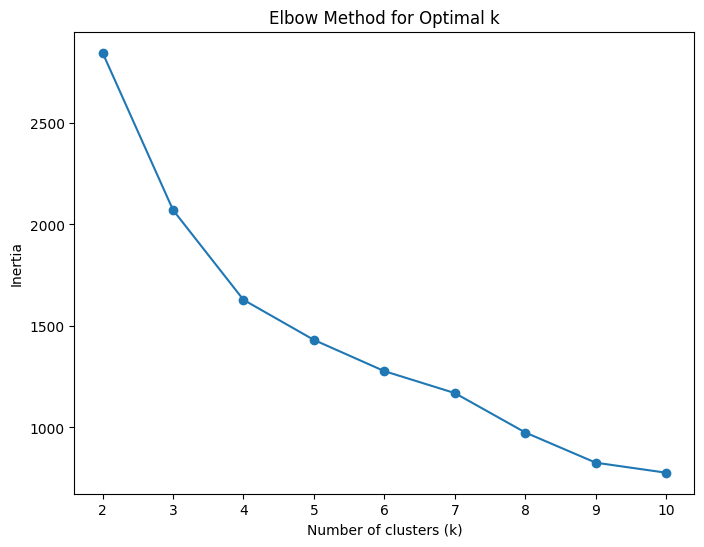

In [ ]:
from sklearn.cluster import KMeans

inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

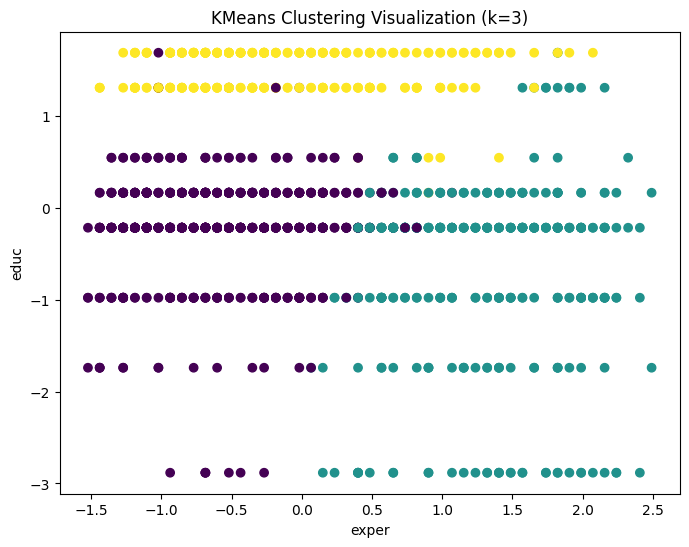

In [ ]:
# Assume k=3 based on the elbow method (replace with actual k if available).  This is a placeholder.
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['exper'], df_scaled['educ'], c=df_scaled['cluster'], cmap='viridis')
plt.xlabel('exper')
plt.ylabel('educ')
plt.title('KMeans Clustering Visualization (k=3)') # Update k if different
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the data for splitting
X = df_scaled.drop('cluster', axis=1)
y = df_scaled['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1008, 3)
X_test shape: (252, 3)
y_train shape: (1008,)
y_test shape: (252,)


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components (experiment with different values)
pca = PCA(n_components=3)  # You can change n_components

# Fit PCA on the training data
pca.fit(X_train)

# Transform training and testing data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original shape of X_train:", X_train.shape)
print("Reduced shape of X_train_pca:", X_train_pca.shape)

print("Original shape of X_test:", X_test.shape)
print("Reduced shape of X_test_pca:", X_test_pca.shape)

Original shape of X_train: (1008, 3)
Reduced shape of X_train_pca: (1008, 3)
Original shape of X_test: (252, 3)
Reduced shape of X_test_pca: (252, 3)


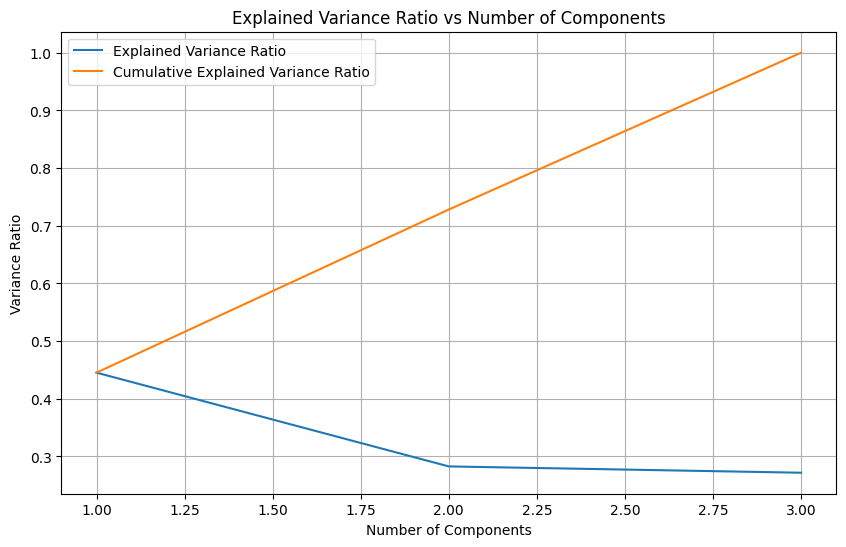

Optimal number of components to explain at least 95% variance: 3
Variance explained by 3 components: 1.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the optimal number of components
optimal_n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of components and explained variance
print(f"Optimal number of components to explain at least 95% variance: {optimal_n_components}")
print(f"Variance explained by {optimal_n_components} components: {cumulative_variance_ratio[optimal_n_components - 1]:.4f}")